## D213 Performance Assessment - Time Series Modeling

**Name:** Coots, Anthony.  
**Affiliation:** Grad Student M.Sc Data Analytics. <br />
**Date:** `2024-06-10`  
**Version:** 1.1.0, r0.

### Introduction

"As a data analyst, you will assess continuing data sources for their relevance to specific research questions throughout your career.

In your previous coursework, you performed data cleaning and exploratory data analysis on your data. You have seen basic trends and will now build more sophisticated statistical models.

For this task, you will select one of the data sets and associated data dictionaries from "[Data Files and Associated Dictionary Files](https://access.wgu.edu/ASP3/aap/content/f9ck5mr9dk4fcd054klw.html)" in the Web Links section.

After you choose your organizational data set, you will review the data dictionary and considerations related to the raw data file you have chosen and prepare the data for time series modeling. You will then analyze that data set using time series modeling, create visualizations, generate forecasts, and deliver the results of your analysis."

*- WGU*

### Competencies

4030.7.2 : Time Series Analysis
- The graduate applies time series models in generating forecasts.

<br /><br /><br /><br /><br /><br /><br /><br />

### Table of Contents:
- [Research Question](#Research-Question-H)
    - [Research Question](#Research-Question)
    - [Objectives or Goals](#Objectives-or-Goals)
- [Method Justification](#Method-Justification)
    - [Summary of Assumptions](#Summary-of-Assumptions)
- [Data Preparation](#Data-Preparation)
    - [Line Graph Visualization](#Line-Graph-Visualization)
    - [Time Step Formatting](#Time-Step-Formatting)
    - [Stationarity](#Stationarity)
    - [Steps to Prepare the Data](#Steps-to-Prepare-the-Data)
    - [Prepared Data Set](#Prepared-Data-Set)
- [Model Identification and Analysis](#Model-Identification-and-Analysis)
    - [Report Findings and Visualizations](#Report-Findings-and-Visualizations)
    - [ARIMA Model](#ARIMA-Model)
    - [Forecasting using ARIMA Model](#Forecasting-using-ARIMA-Model)
    - [Output and Calculations](#Output-and-Calculations)
    - [Code](#Code)
- [Data Summary and Implications](#Data-Summary-and-Implications)
    - [Results](#Results)
    - [Annotated Visualization](#Annotated-Visualization)
    - [Recommendation](#Recommendation)
- [Reporting](#Reporting)
    - [Sources for Third-Party Code](#Sources-for-Third--Party-Code)
    - [Sources](#Sources)

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

## Research Question<a name="Research-Question-H"></a>

### A1: Research Question <a name="Research-Question"></a>

*Summarize one research question relevant to a realistic organizational situation and can be addressed using the selected data set and time series modeling techniques*.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Hospitals face challenges as consequence of frequent patient readmission. These challenges include, but are not limited to financial penalties that are given by organizations such as the '*Centers for Medicare and Medicaid Services* (CMS).' The executives mentioned in the data dictionary are interested in understanding the revenue trends during the initial years (years not listed) of operation to assess the financial impack from patient readmissions. **A**uto**R**egressive **I**ntegrated **M**oving **A**verage (ARIMA), is a time series modeling technique that will be used in this data analysis to analyze and predict revenue trends from the '*medical_time_series*' data provided; The analysis aims to use ARIMA to assist the hospital executives interested in the penalties associated with patient readmission by analyzing and predicting the revenue trends from the data provided. Considering this, the following research question arises:

Question: "*How effectively can ARIMA time series modeling forecast the revenue trends from the data provided, in order to assist with managing patient readmission penalties*?"

### A2: Objectives or Goals <a name="Objectives-or-Goals"></a>

*Define each of the objectives or goals of the data analysis*.

Objectives/Goals:
- Visualize Revenue Trends:<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Utilize an ARIMA model to analyze and visualize the revenue trends, includes seasonality and growth/decay for the first two years of hospital operations. It is important to note that no specific timeline has been given so we will set the time line beginning at January 1st, 2022 and go to January 1st, 2024.<br /><br />
- Forecast Future Revenue:<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Apply an ARIMA model to forecast revenue for the next 30 days for planning based on the projected outcome.<br /><br />
- Evaluate Model's Accuracy/Reliability:<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Assess the ARIMA model's performance using evaluation and error metrics such as RMSE, MAE and AIC/BIC so that the model is accurate and reliable for forecasting.<br /><br />
- Report Findings:<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Compile the results in order to report on the model's effectivity. Insights that comes from the model should be reported for hospital executive interpretation.

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

## Method Justification <a name="Method-Justification"></a>

### B1: Summary of Assumptions <a name="Summary-of-Assumptions"></a>

*Summarize each of the assumptions of a time series model, including stationarity and autocorrelated data*.

Assumptions:
- Stationarity:<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ARIMA models require the data it uses to be stationary. The data being stationary means that the statistical metrics of the data such as mean and variance are constant over time. The data may exhibit seasonal patterns (patterns that fluctuate suddenly in a given season), however this pattern should be consistent at the very least. Non-stationary data may require transformations such as differencing to make the non-stationary data, stationary. To further expand on this, differencing is the operation of subtracting a prior observation, $t-1$, from the current observation $t$, to stabilize the mean in a time series.<br /><br />
- Autocorrelation:<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ARIMA models also assume the current observed value, $X_t$, in the time series is correlated to the prior value, $X_{t-1}$. This autocorrelation helps in creating the model of the time series based on the past observations otherwise known as lag. The model is assigned a lag parameter using the statsmodels.tsa.arima.model import before considering forecasting future observations.<br /><br />
- Linearity:<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The last assumption for this analysis to mention is the assumption of linearity in an ARIMA model. The model assumes a linear relationship between the transformed observation and the prior observations which may involve various amounts of lag.

<br /><br /><br /><br /><br /><br />

## Data Preparation <a name="Data-Preparation"></a>

### C1: Line Graph Visualization <a name="Line-Graph-Visualization"></a>

*Provide a line graph that is labeled and is a complete realization of the time series*.

In [340]:
# Import list.
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [341]:
# What is my current working directory?
print("\n\n Current Working Directory: " + os.getcwd() + '\n')
# The following is where the data set should be for analysis:



 Current Working Directory: C:\Users\acoots\Desktop\Personal\Education\WGU\Data Analytics, M.S\D213 - Advanced Data Analytics\Task 1 - Time Series Modeling



In [342]:
# Read data into DataFrame.
df = pd.read_csv("medical_time_series.csv")

In [343]:
# Identify the data types in the DataFrame, df.
print(df.dtypes)

Day          int64
Revenue    float64
dtype: object


In [344]:
# Convert to datetime.
df['Day'] = pd.to_datetime(
    df['Day'], 
    unit = 'D',
    # Start the data after this day.
    origin = pd.Timestamp('2021-12-31')
)
# The data dictionary does not provide a timeline, here we make one!

In [345]:
# Set the days column as the index in the DataFrame.
df.set_index('Day', inplace = True)

### 

In [346]:
# Is there any values missing?
missing_cnt = df.isnull().sum().iloc[0]

# Is missing?
if int(missing_cnt) > 0:
    print("Data is missing for " + str(missing_cnt) + " rows.")
else:
    print("No data is missing.")

No data is missing.


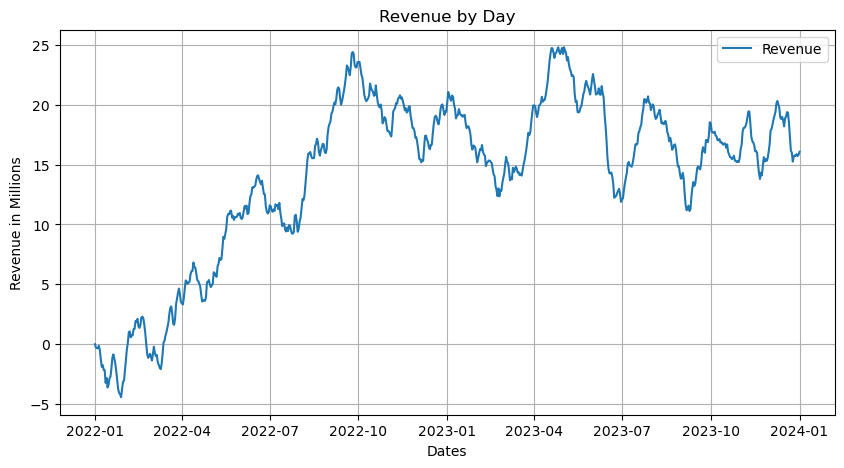

In [347]:
# Display the line graph visualization.

# Size the visual.
plt.figure(figsize=(10, 5))

# Plot the data, days are now the index.
plt.plot(df['Revenue'], label = 'Revenue')

# Fancy labels and tools.
plt.title('Revenue by Day')
plt.xlabel('Dates')
plt.ylabel('Revenue in Millions')
plt.legend()
plt.grid(True)

# Display.
plt.show()

<br /><br />

### C2: Time Step Formatting <a name="Time-Step-Formatting"></a>

*Describe the time step formatting of the realization, including any gaps in measurement and length of sequence*.

Realization:
- Formatting:<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The '*medical_time_series*' data set captures the daily revenue over the two year period. The two year period is not defined in the data dictionary provided therefore a timeline is made up between January 1st, 2022 and January 1st, 2024.<br /><br />
- Gaps:<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Examining the data set and the visual finds that there are no gaps in the data; Every day in the two year period is accounted for.<br /><br />
- Length of sequence:<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The length of sequence is exactly 731 days. In this analysis, from January 1st, 2022 to January 1st, 2024 for the daily revenue for the first two years of hospital operation, ideal for the ARIMA model to be. It is important to note that the year 2015 appears in the data dictionary however this is out of context relevant to the analysis.<br /><br />
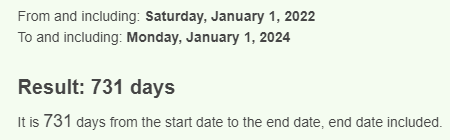<br /><br />
Calculation provided by [timeanddate.com](#timeanddate.com)

<br /><br /><br /><br /><br />

### C3: Stationarity <a name="Stationarity"></a>

*Evaluate the stationarity of the time serries*.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The stationarity of the time series can be assessed using the Augmented Dickey-Fuller (ADF) statistical test. The following Python code does this statistical test:

In [348]:
# Assign the result of the test to 'res.'
res = adfuller(df['Revenue'])

In [349]:
# Output the results.
pv = res[1]

# The p-value is assigned to res[1].
print("p-value: " + str(pv))

p-value: 0.19966400615064356


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The series is not stationary as evaluated from the Augmented Dickey-Fulley statistical test, steps will have to be taken in order to make the data stationary. To address this, transformations either exponential, logarithmic or differencing can be applied to stabilize the mean and variance. Using differencing, re-evaluation will be done to confirm the data then meets the requirements for ARIMA.


In [350]:
# Apply differencing.
df_diff = df.copy()
df_diff['Revenue_dot_diff'] = df_diff['Revenue'].diff()

In [351]:
# Drop the null values created by diff.
df_diff = df_diff.dropna()

In [352]:
# Assign the result of the test to 'res_diff.'
res_diff = adfuller(df_diff['Revenue_dot_diff'])

In [353]:
# Output the results.
pv_diff = res_diff[1]

# The p-value is assigned to res_diff[1].
print("p-value: " + str(pv_diff))

p-value: 5.113206978840171e-30


In [354]:
# Statistical significance.
if pv_diff < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")

The series is stationary.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The initial Augmented Dickey-Fuller test indicated that the series was non-stationary with a p-value of 0.19966 >= 0.05 suggesting that the mean and variance of the series were in fact not constant with respect to time. The stationarity or lack thereof could have also been assessed visually with the initial line graph of the time series. To make the time series stationary, the differencing technique was applied to the time series which stabilized the mean and variance as seen in the p-value of 5.11e-30 < 0.05.

<br /><br /><br /><br /><br /><br /><br /><br /><br/><br /><br /><br /><br/><br /><br /><br /><br/><br /><br /><br /><br/><br /><br /><br /><br/><br /><br /><br /><br /><br /><br /><br />

### C4: Steps to Prepare the Data <a name="Steps-to-Prepare-the-Data"></a>

*Explain the steps used to prepare for analysis*.

Steps:
- Data visualization and integrity check:<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The analysis so far begun wuth visualization of the time series of the daily revenue where no missing values were found and also to initially identify data patterns. This step is important to guarantee that the data is complete and suitable for analysis.<br /><br />
- Evaluating and implementing stationarity:<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The time series was seen to be non-stationary both visually and by statistical measure. Non-stationary data was then treated by differencing in order to be reliable for modeling/forecasting with ARIMA.<br /><br />
- Splitting data into training and testing sets:<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The data will now require to be split into training (80% of current data set) and testing (20%) data sets. The 80/20 ratio was chosen to maximize the amount of data that is available for model training while leaving a decent amount for model validation. The testing set is the most recent 20% of the data in order to predict upcoming trends. These data sets will be exported as '*training_medical_time_series.csv*' and '*testing_medical_time_series.csv*' to reflect the original '*medical_time_series*' data set provided.<br /><br /> 

In [355]:
# Create the training/test point reference split.
splitting_point = int(len(df_diff['Revenue_dot_diff']) * 0.80)

# Create training set.
training_set = df_diff['Revenue_dot_diff'][:splitting_point]

# Create testing set.
testing_set = df_diff['Revenue_dot_diff'][splitting_point:]

In [356]:
# Show count for 80%/20%, respectively.
print("Training set size: " + str(training_set.size))
print("Testing set size: " + str(testing_set.size))

Training set size: 584
Testing set size: 146


In [357]:
# Does split combined equal original size of DataFrame?
print("Size of DataFrame: " + str(len(df_diff)))
print("Training + Test size: " + str(training_set.size + testing_set.size))

Size of DataFrame: 730
Training + Test size: 730


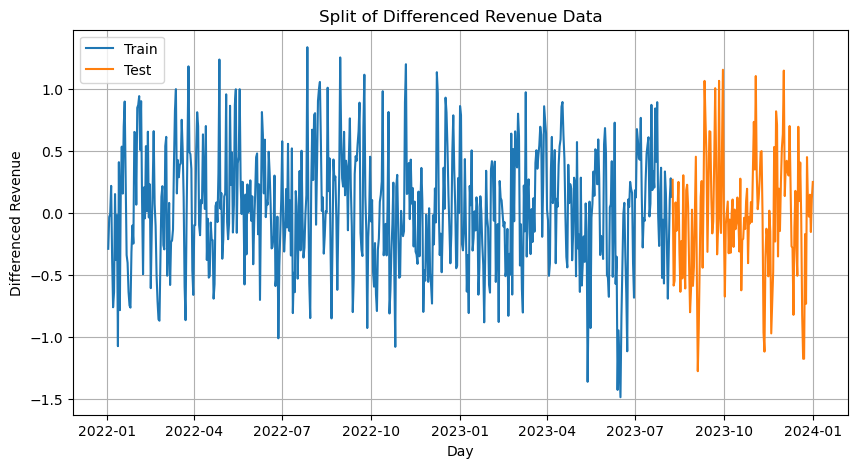

In [358]:
# Visualize the data after split.

# After.
plt.figure(figsize=(10,5))
plt.plot(training_set, label='Train')
plt.plot(testing_set, label='Test')
plt.title('Split of Differenced Revenue Data')
plt.xlabel('Day')
plt.ylabel('Differenced Revenue')
plt.grid(True)
plt.legend()
plt.show()

<br /><br /><br /><br /><br /><br /><br /><br /><br />

### C5: Prepared Data Set <a name="Prepared-Data-Set"></a>

*Provide a prepared, cleaned data set.*

In [359]:
# Exporting cleaned training data set.
training_set.to_csv('training_medical_time_series.csv')

# Exporting cleaned testing data set.
testing_set.to_csv('testing_medical_time_series.csv')

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

## Model Identification and Analysis <a name="Model-Identification-and-Analysis"></a>

### D1: Report Findings and Visualizations <a name="Report-Findings-and-Visualizations"></a>

*Report the annotated findings with visualizations of the data analysis.*

The Presence or Lack of a Seasonal Component:

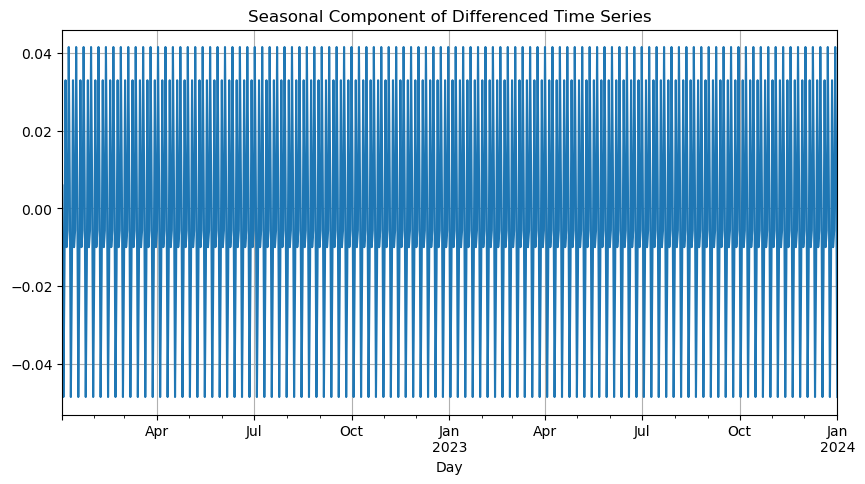

In [360]:
# Figure size for all 6 measures.
plt.figure(figsize=(10, 5))

# Result of seasonal decompose of differenced DataFrame.
res_diff = seasonal_decompose(df_diff['Revenue_dot_diff'])

# Plot results.
res_diff.seasonal.plot(title = "Seasonal Component of Differenced Time Series")
plt.grid(True)
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The plot for the seasonal decomposition shows a repetitive pattern for the two year period showcasing seasonality. The seasonality is important as it suggest that certain times of the year see change in the hospital's revenue. By understanding these patterns the hospital executives can anticipate fluctuations in revenue and potentially map the correlation to such.<br /><br />

<br />

Trends:

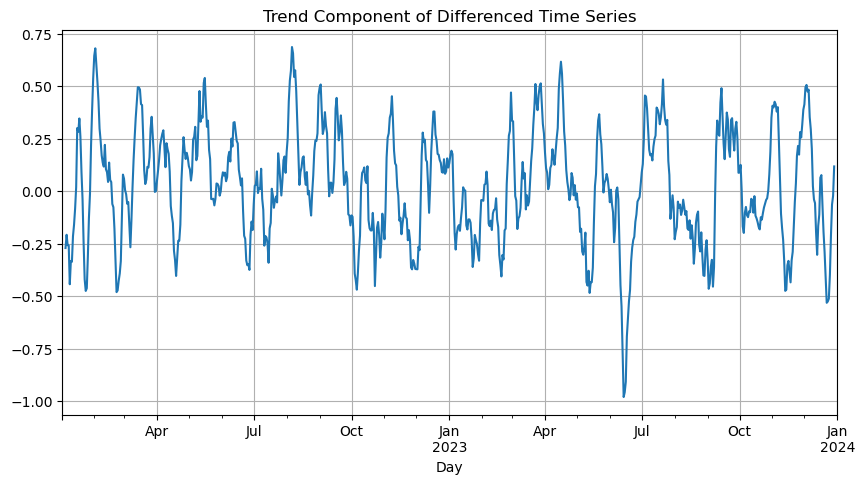

In [361]:
# Figure size for all 6 measures.
plt.figure(figsize=(10, 5))

# Plot results.
res_diff.trend.plot(title = "Trend Component of Differenced Time Series")
plt.grid(True)
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The trend visual shows variability in the data but does not show a consistent increase or decrease for the period. The lack of a consistent trend is important as it suggests the hospitals change in revenue is stable without considering the seasonal fluctuation. This stability means that forecasting does not ride on long-term increases or decreases and can simplify the model's nature to focus on the short-term fluctuations instead.

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

The Autocorrelation Function:

<Figure size 1000x500 with 0 Axes>

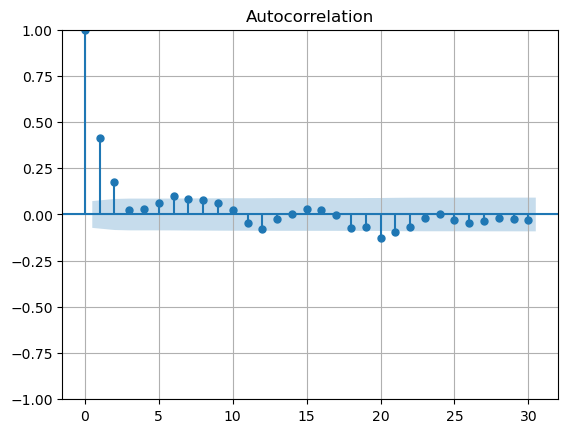

In [362]:
# Figure size for all 6 measures.
plt.figure(figsize=(10, 5))

# Plot results.
plot_acf(df_diff['Revenue_dot_diff'], lags = 30)
plt.grid(True)
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The autocorrelation function (ACF) is strong at lag 1. This component is used for selecting the AR parameter of the ARIMA model, AR(1). This suggests that an observation is a good indicator of the next day's observation, revenue. This is important for the ARIMA model in order to make predictions based on the short-term.

<br /><br /><br /><br /><br /><br />

The Spectral Density:

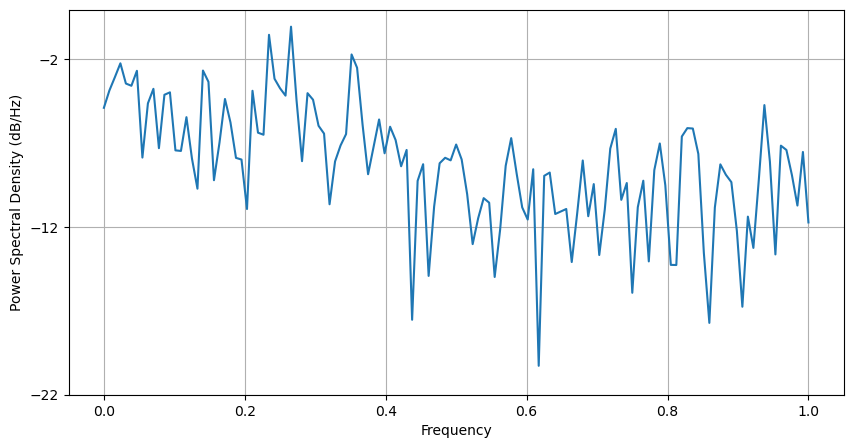

In [363]:
# Figure size for all 6 measures.
plt.figure(figsize=(10, 5))

# Plot results.
plt.psd(df_diff['Revenue_dot_diff'])
plt.grid(True)
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The power spectral density indicates higher power at lower frequencies with many peaks indicating a high variance in the data. Understanding what causes these peaks can help in tuning the forecasting model.

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

The Decomposed Time Series:

<Figure size 1000x500 with 0 Axes>

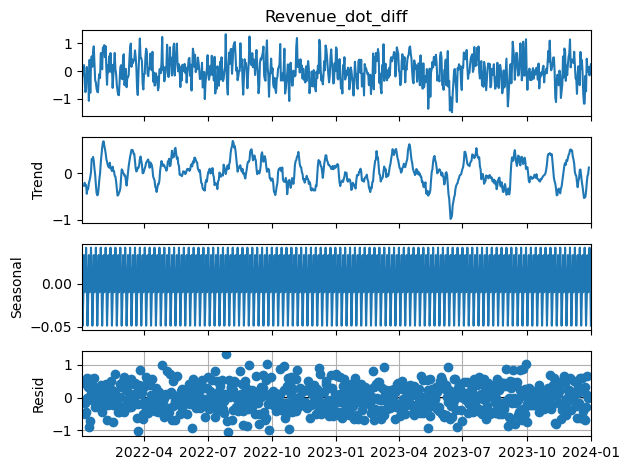

In [364]:
# Figure size for all 6 measures.
plt.figure(figsize=(10, 5))

# Plot results.
res_diff.plot()
plt.grid(True)
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The plots of the decomposed time series show how the data can be broken down into trend, seasonal and residual components.

<br /><br /><br /><br /><br /><br /><br /><br />

Confirmation of the Lack of Trends in the Residuals of the Decomposed Series:

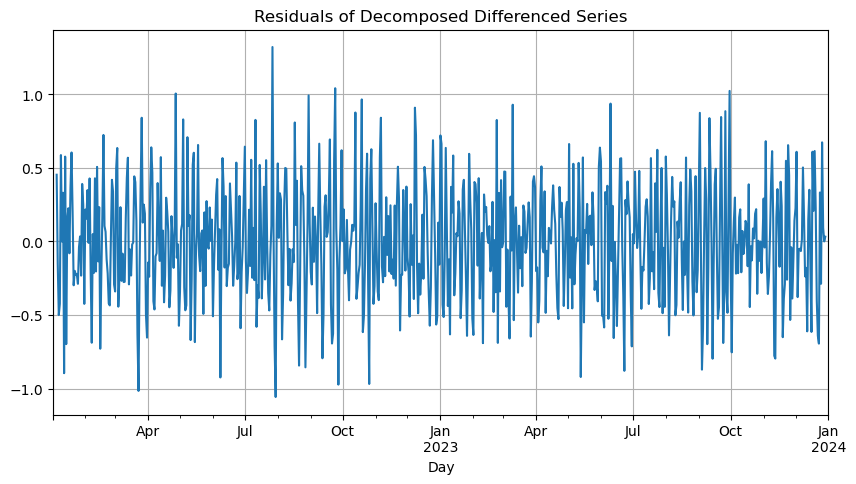

In [365]:
# Figure size for all 6 measures.
plt.figure(figsize=(10, 5))

res_diff.resid.plot(title="Residuals of Decomposed Differenced Series")
plt.grid(True)
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;There is no trend of the residuals in the decomposed time series.

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

### D2: ARIMA Model <a name="ARIMA-Model"></a>

*Identify an ARIMA model that accounts for the observed trend and seasonality of the time series data*.

In [366]:
# Create instance of ARIMA model based on AR(1), is stationary and no moving avg (0, 0)
mod = ARIMA(training_set, order = (1, 0, 0), freq = 'D')

# Assign the results.
res = mod.fit()

C:\Users\acoots\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [367]:
# Summary of the model.
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:       Revenue_dot_diff   No. Observations:                  584
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -350.349
Date:                Wed, 12 Jun 2024   AIC                            706.698
Time:                        11:58:07   BIC                            719.808
Sample:                    01-02-2022   HQIC                           711.808
                         - 08-08-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0328      0.031      1.063      0.288      -0.028       0.093
ar.L1          0.4079      0.038     10.748      0.000       0.333       0.482
sigma2         0.1943      0.012     15.948      0.0

### D3: Forecasting using ARIMA Model <a name="Forecasting-using-ARIMA-Model"></a>

*Provide an accurate forecast using the ARIMA model*.

In [368]:
# Get the 30 day forecast results by using get_forecast.
f_res = res.get_forecast(steps = 30)

In [369]:
# Get the values.
f_diff = f_res.predicted_mean
print(f_diff)

2023-08-09    0.071071
2023-08-10    0.048405
2023-08-11    0.039159
2023-08-12    0.035388
2023-08-13    0.033850
2023-08-14    0.033223
2023-08-15    0.032967
2023-08-16    0.032863
2023-08-17    0.032820
2023-08-18    0.032803
2023-08-19    0.032796
2023-08-20    0.032793
2023-08-21    0.032792
2023-08-22    0.032791
2023-08-23    0.032791
2023-08-24    0.032791
2023-08-25    0.032791
2023-08-26    0.032791
2023-08-27    0.032791
2023-08-28    0.032791
2023-08-29    0.032791
2023-08-30    0.032791
2023-08-31    0.032791
2023-09-01    0.032791
2023-09-02    0.032791
2023-09-03    0.032791
2023-09-04    0.032791
2023-09-05    0.032791
2023-09-06    0.032791
2023-09-07    0.032791
Freq: D, Name: predicted_mean, dtype: float64


In [370]:
# Get the confidence intervals.
c_int_diff = f_res.conf_int()
print(c_int_diff)

            lower Revenue_dot_diff  upper Revenue_dot_diff
2023-08-09               -0.792856                0.934998
2023-08-10               -0.884621                0.981430
2023-08-11               -0.904871                0.983190
2023-08-12               -0.910461                0.981237
2023-08-13               -0.912301                0.980001
2023-08-14               -0.912978                0.979424
2023-08-15               -0.913243                0.979177
2023-08-16               -0.913348                0.979074
2023-08-17               -0.913391                0.979032
2023-08-18               -0.913409                0.979014
2023-08-19               -0.913416                0.979007
2023-08-20               -0.913419                0.979004
2023-08-21               -0.913420                0.979003
2023-08-22               -0.913420                0.979003
2023-08-23               -0.913420                0.979002
2023-08-24               -0.913421                0.9790

In [371]:
# Get the last value from the non differenced data set.
last = df['Revenue'].iloc[-1]

In [372]:
# Reintegrate the differences.
f_val = np.cumsum(np.insert(f_diff.values, 0, last))[-30:]

In [373]:
# Create bounds by adjusting confidence intervals.

# Lower bound.
lower_ = np.cumsum(np.insert(c_int_diff.iloc[:, 0].values, 0, last))[-30:]

# Upper bound.
upper_ = np.cumsum(np.insert(c_int_diff.iloc[:, 1].values, 0, last))[-30:]

In [374]:
# Create new index from the last date in the original data.
f_idx = pd.date_range(
    start = df.index[-1] + pd.Timedelta(days = 1),
    periods = 30,
    freq = 'D'
)

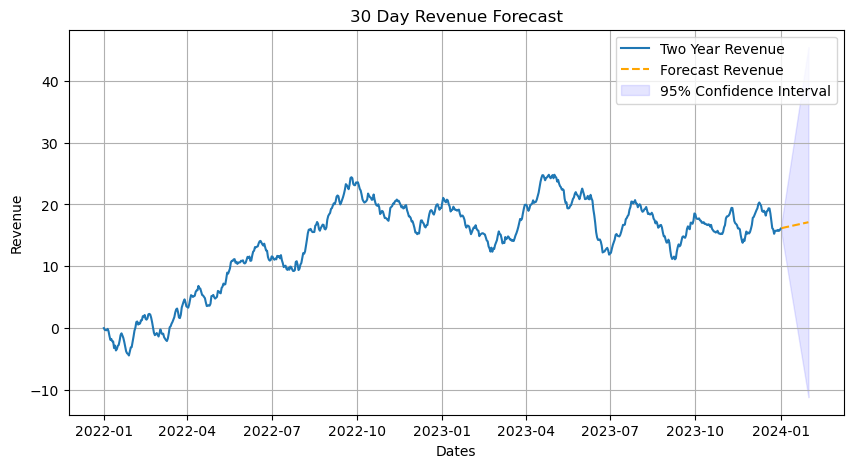

In [375]:
# Visualize the forecast.
plt.figure(figsize=(10, 5))

# Plot the two year data.
plt.plot(df.index, df['Revenue'], label = 'Two Year Revenue')

# Plot the forecast data.
plt.plot(
    f_idx, 
    f_val, 
    color = 'Orange', 
    linestyle = '--',
    label = 'Forecast Revenue'
)

# Plot bounds on confidence.
plt.fill_between(
    f_idx,
    lower_,
    upper_,
    color = 'b',
    alpha = 0.1,
    label = '95% Confidence Interval'
)

# Annotations.
plt.title('30 Day Revenue Forecast')
plt.xlabel('Dates')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.show()

### D4: Output and Calculations <a name="Output-and-Calculations"></a>

*Provide all the complete and accurate output and calculations of the analysis*.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The remaining output and calculations is the formula for the forecast and model evaluation. All other output and calculations can be found starting at D1, Report Findings and Visualizations.<br /><br />
- Forecast formula:<br /><br />
${X}_{t} = 0.4079 * X_{t-1} + 0.0194 + a_t$ <br /><br />
Where:<br />
$X_t$ is the value of the series for a given time, $t$.<br />
$X_{t-1}$ is the coefficient for the first lag.<br />
$a_t$ is the white noise term.<br /><br />

- Evaluation and error metrics:

In [376]:
# The actual values in the provided data.
val = testing_set[:30]

# The predicted values from forecasting.
pr_val = f_diff

# Mean Squared Error.
rmse = np.sqrt(mean_squared_error(val, pr_val))

# Mean Absolute Error.
mae = mean_absolute_error(val, pr_val)

In [377]:
# Output the AIC score.
print("AIC: " + str(res.aic))

AIC: 706.6981555073241


In [378]:
# Output the BIC score.
print("BIC: " + str(res.bic))

BIC: 719.8078584558089


In [379]:
# Output the RMSE.
print("RMSE: " + str(rmse))

RMSE: 0.5105650197875524


In [380]:
# Output the MAE.
print("MAE: " + str(mae))

MAE: 0.4072709593284696


### D5: Code <a name="Code"></a>

*Provide  the code used to support the implementation of the time series model*.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The code has been done starting at C1. Providing the same information twice would likely prove to be redundant. Please refer to the Python code from above.

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

## Data Summary and Implications <a name="Data-Summary-and-Implications"></a>

### E1: Results <a name="Results"></a>

*Discuss the results of the data analysis*.

- Selection of ARIMA model:<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The ARIMA(1, 0, 0) model was selected due to simplicity and the statistically significant autocorrelation at lag 1. The p-value for z-score, P>|z| was 0.00 < 0.05. This model captures the past's influence on future values as one-removed. Alternative methods with a higher lag such as AR(2) and so on were considered but did not show worthy benefit considering the extra complexity.<br /><br />
- Prediction interval of the forecast:<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The prediction intervals are made from the ARIMA model and its' forecast output, which calculated these intervals based on the estimated variance and distribution of the forecast errors (see the Python in the prior section.) These intervals provide a 95% confidence range for each day in the 30 day forecast. This confidence is reflective of the uncertainty of predictions and how quickly the revenue could rise or drop. <br /><br />
- Justification of the forecast length:<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The forecast length of 30 days was selected to align with a monthly operation review for the hospital. The period allows for a balanced time range before revenue could exponentially increase or decrease. Only predicting tomorrow does not do the hospital executives much good and the further the prediction the more uncertain the executives should be considering fluctuation and general uncertainty in everyday life.<br /><br />
- Model evaluation procedure and error metric:<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The model was evaluated using RMSE, MAE, AIC and BIC for assessment of the forecasting accuracy and complexity. The RMSE calculated the square root of the MSE at ~0.51 and the MAE a value of ~0.41 which demonstrates a typical range in error for revenue predictions. The AIC and BIC scores were ~706 and ~720, respectively. The scores are important for further tuning of the model as necessary where the lower the score the better the model.

### E2: Annotated Visualization <a name="Annotated-Visualization"></a>

*Provide the annotated visualization of the forecast of the final model compared to the test set*.

In [381]:
print("Start of test/forecast overlay: " + str(training_set.size))
print("End of test/forecast overlay: " + str(training_set.size + testing_set.size - 1))

Start of test/forecast overlay: 584
End of test/forecast overlay: 729


In [382]:
test_forecast = res.get_prediction(start = training_set.size, end = (training_set + testing_set).size - 1, dynamic = True)

In [383]:
forecast_ = pd.DataFrame(test_forecast.predicted_mean)
forecast_.index = pd.to_datetime(forecast_.index)
training_set.index = pd.to_datetime(training_set.index)
forecast_df = pd.concat([training_set, forecast_], axis = 1)
forecast_df['Revenue'] = training_set.combine_first(forecast_df['predicted_mean'])
forecast_df.drop(columns = ['Revenue_dot_diff', 'predicted_mean'], inplace = True)
forecast_df = forecast_df.cumsum()
forecast_df

,Revenue
2022-01-02,-0.292356
2022-01-03,-0.327772
2022-01-04,-0.339987
2022-01-05,-0.124888
2022-01-06,-0.491590
...,...
2023-12-28,24.033683
2023-12-29,24.066474
2023-12-30,24.099265
2023-12-31,24.132056


In [384]:
ct_int = test_forecast.conf_int()
ct_int

,lower Revenue_dot_diff,upper Revenue_dot_diff
2023-08-09,-0.792856,0.934998
2023-08-10,-0.884621,0.981430
2023-08-11,-0.904871,0.983190
2023-08-12,-0.910461,0.981237
2023-08-13,-0.912301,0.980001
...,...,...
2023-12-28,-0.913421,0.979002
2023-12-29,-0.913421,0.979002
2023-12-30,-0.913421,0.979002
2023-12-31,-0.913421,0.979002


In [385]:
# Bounds.
tlower_ = np.cumsum(np.insert(ct_int.iloc[:, 0].values, 0, last))[-146:]
tupper_ = np.cumsum(np.insert(ct_int.iloc[:, 1].values, 0, last))[-146:]

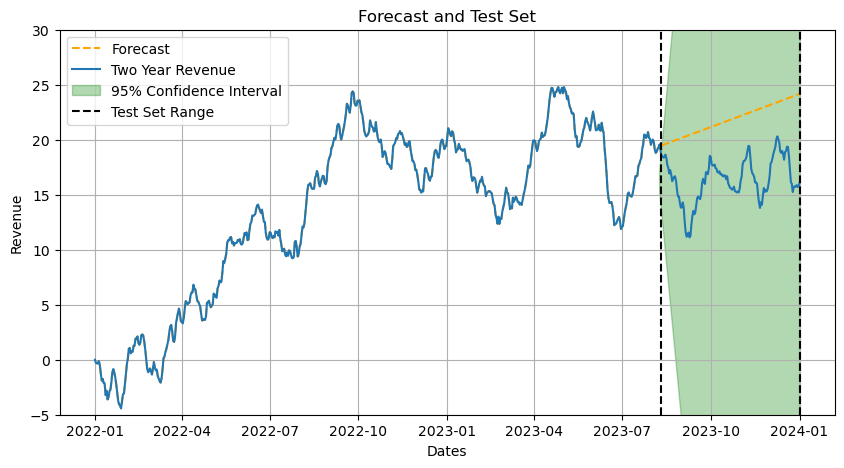

In [386]:
plt.figure(figsize=(10, 5))

# Forecast of test data.
plt.plot(
    forecast_df,
    linestyle = '--',
    color = 'Orange',
    label = 'Forecast'
)

# All historical.
plt.plot(df.index, df['Revenue'], label ='Two Year Revenue')

# 95% confidence interval.
plt.fill_between(
    ct_int.index,
    tupper_,
    tlower_,
    color = 'green',
    alpha = 0.3,
    label = '95% Confidence Interval'
)


# Annotations.
plt.axvline(x = 19579, color = 'black', linestyle = '--', label = 'Test Set Range')
plt.axvline(x = 19723, color = 'black', linestyle = '--')
plt.title('Forecast and Test Set')
plt.xlabel('Dates')
plt.ylabel('Revenue')
plt.ylim(-5, 30)
plt.legend()
plt.grid(True)
plt.show()

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

### E3: Recommendation <a name="Recommendation"></a>

*Recommend a course of action based on the results*.

Based on the results of the data analysis, the recommend course of action is as follows:<br /><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Continue to use the ARIMA(1, 0, 0) model and apply the small changes required to forecast the following months as the data changes. The model's predictions should be used to call for monthly review for the hospital executives. The error metrics used like RMSE and MAE have proven a fact, that predictions have and never will be perfect but with the data provided are sufficient to get an idea for revenue for the month ahead. Regularly re-evaluate the parameters and performance of the model every 3 months to ensure that any changes in the data do not go unnoticed. External factors not related to the hospital such as economic factors may affect the hospital and thus the revenue. As the hospital executives implement different policies as patient data changes, ensure that the forecast is being considered and may be related to any drastic changes in operation while fighting readmission rates. Communicate updates to the model as they change in order for all executives to be aware of the landscape given the forecast.

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

## Reporting <a name="Reporting"></a>

### Sources for Third-Party Code <a name="Sources-for-Third--Party-Code"></a>

DataCamp Course Resource.

### Sources <a name="Sources"></a>

Brownlee, J. (2020, June 22). How to remove trends and seasonality with a difference transform in Python. MachineLearningMastery.com. https://machinelearningmastery.com/remove-trends-seasonality-difference-transform-python/<br /><br />
DataCamp Course Resouce.<br /><br />
WGU Cohort Course Resources.<br /><br /> 